# Training

In [1]:
# imports
import json
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re

import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# plt.style.use('Solarize_Light2')
# %matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhuzilu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load reviews data

file_path = 'dataset_files/Cell_Phones_and_Accessories.json'
# file_path = 'dataset_files/Sports_and_Outdoors.json'

try:
    with open(file_path, 'r') as f:
        data = [json.loads(line.strip()) for line in f]
    print(f"Successfully loaded {len(data)} reviews from {file_path}")
    # Example: print the first review
    # print(data[0])

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 3185845 reviews from dataset_files/Cell_Phones_and_Accessories.json


In [3]:
df = pd.DataFrame(data)
df.head()


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,{'$oid': '5a1321d5741a2384e802c552'},A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200,"01 13, 2013",Cell_Phones_and_Accessories,1.0
1,{'$oid': '5a1321d5741a2384e802c557'},A1BJGDS0L1IO6I,0110400550,"cf ""t""","[0, 3]",ITEM NOT SENT from Blue Top Company in Hong Ko...,1.0,ITEM NOT SENT!!,1359504000,"01 30, 2013",Cell_Phones_and_Accessories,0.0
2,{'$oid': '5a1321d5741a2384e802c550'},A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5.0,Great product,1353542400,"11 22, 2012",Cell_Phones_and_Accessories,1.0
3,{'$oid': '5a1321d5741a2384e802c553'},A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5.0,Perfect,1374105600,"07 18, 2013",Cell_Phones_and_Accessories,1.0
4,{'$oid': '5a1321d5741a2384e802c559'},A30P2CYOUYAJM8,0110400550,Gene,"[1, 1]",I got this for my 14 year old sister. She lov...,4.0,Cool purchase.,1363737600,"03 20, 2013",Cell_Phones_and_Accessories,1.0


In [255]:
len(df[df['class']==0])

930859

In [4]:
# df['verified_purchase'].describe()
df.columns


Index(['_id', 'reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'category',
       'class'],
      dtype='object')

In [8]:
df = df[['summary','reviewText','class']]

In [5]:
ps = PorterStemmer() # initializing porter stemmer

In [10]:
# df['summary'][1]+df['reviewText'][1]

In [120]:
corpus=[]
# sentences=[]
for i in range(len(df)):
# for i in range(40001,len(df)):
    # review=re.sub('[^a-zA-Z]',' ', df\n\n['summary']\n [i]+df['reviewText'][i])
    review=re.sub('[^a-zA-Z]',' ', df['reviewText'][i])
    review=review.lower()
    # corpus.append(review)
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)
    # corpus.append(review)

In [131]:
import csv

with open('dataset_files/celldata.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
    
corpus = []
for row in data:
    sen = ''.join(row)
    corpus.append(sen)

In [132]:
corpus[:5]

['best phone case ever everywher go get ton compliment perfect condit well',
 'item sent blue top compani hong kong two month report use compani happi',
 'saw case theme park store dollar good qualiti great price',
 'case fit perfectli alway get compliment crack drop wonder protect',
 'got year old sister love realli realli complaint yeah']

In [9]:
df['reviewText'][0]

'Best phone case ever . Everywhere I go I get a ton of compliments on it. It was in perfect condition as well.'

In [234]:
cv = CountVectorizer(max_features = 5000, ngram_range = (1, 6))

In [235]:
# splitting dataset into features and label

X = cv.fit_transform(corpus[:100000]).toarray()
y = df['class'][:100000]

In [236]:
cv.get_feature_names_out()[0:5]

array(['aa', 'aaa', 'aaa batteri', 'abil', 'abl'], dtype=object)

In [237]:
# splitting dataset into train data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [238]:
# Naive Bayes

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [239]:
# storing models
# joblib.dump(cv, "model/cv3.pkl")
# joblib.dump(classifier, "model/MultinomialNB3.pkl")

In [240]:
# loaded_cv = joblib.load('model/cv2.pkl')
# loaded_classifier = joblib.load('model/MultinomialNB2.pkl')

In [246]:
classifier = MultinomialNB()

In [247]:
y_pred = classifier.predict(X_test)
# y_pred = classifier.predict(X)
# y_pred = loaded_classifier.predict(X_test)


NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [242]:
metrics.accuracy_score(y_test, y_pred)

0.83105

In [161]:
# y_pred = classifier.predict(X)
# metrics.accuracy_score(y, y_pred)

In [243]:
mx = metrics.confusion_matrix(y_test, y_pred)
mx

array([[ 5082,  1761],
       [ 1618, 11539]])

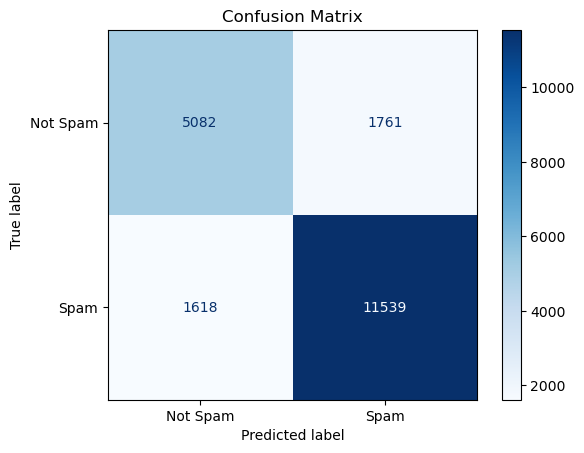

In [244]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix=mx, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [245]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      6843
         1.0       0.87      0.88      0.87     13157

    accuracy                           0.83     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.83      0.83      0.83     20000



In [ ]:
# prompt: save the model classifier to drive

import joblib

# Save the model to your Google Drive
joblib.dump(classifier, 'outdoor_model_stopword_100_withoutsummary.pkl')


['outdoor_model_stopword_100_withoutsummary.pkl']

In [ ]:
file_path2 = 'dataset_files/Toys_and_Games/Toys_and_Games.json'

try:
    with open(file_path2, 'r') as f:
        data2 = [json.loads(line.strip()) for line in f][:1000]
    print(f"Successfully loaded {len(data2)} reviews from {file_path2}")
    # Example: print the first review
    # print(data[0])

except FileNotFoundError:
    print(f"Error: File not found at {file_path2}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 1000 reviews from dataset_files/Toys_and_Games/Toys_and_Games.json


In [ ]:
df2 = pd.DataFrame(data2)
df2.head()

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,{'$oid': '5a13282b741a2384e879a620'},A3C9CSW3TJITGT,0005069491,Renee,"[0, 0]",I love these felt nursery rhyme characters and...,4.0,Charming characters but busy work required,1377561600,"08 27, 2013",Toys_and_Games,1.0
1,{'$oid': '5a13282b741a2384e879a621'},A31POTIYCKSZ9G,0076561046,So CA Teacher,"[0, 0]",I see no directions for its use. Therefore I h...,3.0,No directions for use...,1404864000,"07 9, 2014",Toys_and_Games,0.0
2,{'$oid': '5a13282b741a2384e879a622'},A2GGHHME9B6W4O,0131358936,Dalilah G.,"[0, 0]",This is a great tool for any teacher using the...,5.0,Great CD-ROM,1382400000,"10 22, 2013",Toys_and_Games,1.0
3,{'$oid': '5a13282b741a2384e879a61f'},AMEVO2LY6VEJA,0000191639,Nicole Soeder,"[0, 0]","Great product, thank you! Our son loved the pu...",5.0,Puzzles,1388016000,"12 26, 2013",Toys_and_Games,1.0
4,{'$oid': '5a13282b741a2384e879a623'},A1FSLDH43ORWZP,0133642984,Dayna English,"[0, 0]",Although not as streamlined as the Algebra I m...,5.0,Algebra II -- presentation materials,1374278400,"07 20, 2013",Toys_and_Games,1.0


In [ ]:
corpus=[]
sentences=[]
for i in range(0,len(df2)):
# for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ', df2['reviewText'][i])
    review=review.lower()
    list=review.split()
    # review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    review=[ps.stem(word) for word in list]

    sentences=' '.join(review)
    corpus.append(sentences)

In [ ]:
len(corpus)

1000

In [ ]:
cv = CountVectorizer(max_features = 5000, ngram_range = (1, 5))

In [ ]:
# splitting dataset into features and label

X = cv.fit_transform(corpus).toarray()
y = df2['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.87

In [ ]:
# prompt: save the model classifier to drive

import joblib

# Save the model to your Google Drive
joblib.dump(classifier, 'classifier_model4.pkl')
print("Model saved to /content/drive/MyDrive/LAOPO/amazon_review/classifier_model.pkl")


In [ ]:
# prompt: load model from drive and train with more dataset

import joblib

# Load the saved model
loaded_classifier = joblib.load('classifier_model2.pkl')

# ... (your existing code for data preprocessing, feature extraction etc.) ...

# Assuming 'X_new' and 'y_new' are your new features and labels
# from the additional dataset you want to train with

# Combine the existing training data with the new data
# X_train_combined = np.concatenate((X_train, X_new))  # Assuming X_train exists
# y_train_combined = np.concatenate((y_train, y_new))  # Assuming y_train exists


# Train the loaded model with the combined dataset
# loaded_classifier.fit(X_train_combined, y_train_combined)

# Example using only the new data
loaded_classifier.fit(X_train,y_train)


# Evaluate the model on the test set (or new data)
y_pred_new = loaded_classifier.predict(X_test)
accuracy_new = metrics.accuracy_score(y_test, y_pred_new)
print(f"Accuracy with new data: {accuracy_new}")

# Save the retrained model (optional)
joblib.dump(loaded_classifier, 'retrained_classifier_model.pkl')
print("Retrained model saved.")

# Cleaned up


In [46]:
# load model

import joblib

# Load the saved model
loaded_cv = joblib.load('model/cv.pkl')
loaded_classifier = joblib.load('model/MultinomialNB.pkl')


# Evaluate the model on the test set (or new data)
y_pred_new = loaded_classifier.predict(X)
accuracy_new = metrics.accuracy_score(y, y_pred_new)
print(f"Accuracy with new data: {accuracy_new}")

# Save the retrained model (optional)
# joblib.dump(loaded_classifier, 'retrained_classifier_model.pkl')
# print("Retrained model saved.")

Accuracy with new data: 0.624


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_new))

              precision    recall  f1-score   support

         0.0       0.32      0.17      0.22       317
         1.0       0.68      0.84      0.75       683

    accuracy                           0.62      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.57      0.62      0.58      1000



# Optuna

In [3]:
import optuna

In [4]:
with open('dataset_files/processeddata_cell.json', 'r') as f:
    df1 = [json.loads(line.strip()) for line in f]
df1 = pd.DataFrame(df1)

with open('dataset_files/processeddata_clothing.json', 'r') as f:
    df2 = [json.loads(line.strip()) for line in f]
df2 = pd.DataFrame(df2)

with open('dataset_files/processeddata_home.json', 'r') as f:
    df3 = [json.loads(line.strip()) for line in f]
df3 = pd.DataFrame(df3)

with open('dataset_files/processeddata_sports.json', 'r') as f:
    df4 = [json.loads(line.strip()) for line in f]
df4 = pd.DataFrame(df4)

with open('dataset_files/processeddata_toys.json', 'r') as f:
    df5 = [json.loads(line.strip()) for line in f]
df5 = pd.DataFrame(df5)


In [40]:
df = pd.concat([df1,df2,df3,df4,df5])

In [11]:
cv = CountVectorizer(max_features = 5000, ngram_range = (1, 5))
# splitting dataset into features and label

X = cv.fit_transform(df1['reviewTextEdit']).toarray()
y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.827

In [10]:
cv = CountVectorizer(max_features = 5000, ngram_range = (1, 5))
# splitting dataset into features and label

X = cv.fit_transform(df1['reviewTextEdit']).toarray()
y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Naive Bayes
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.8275

In [12]:
y_pred_prob = classifier.predict_proba(X_test)

In [36]:
y_pred_prob[1],y_test[2041]

(array([0.26370201, 0.73629799]), 0.0)

In [38]:
count = 0
for i in range(len(y_pred)):
    key = y_test.keys()[i]
    if y_pred[i] != y_test[key]:
        print(i,key,"   ",y_pred_prob[i],y_test[key])
        count+=1

1 2041     [0.26370201 0.73629799] 0.0
4 13902     [0.02688704 0.97311296] 0.0
5 11963     [0.99354307 0.00645693] 1.0
9 8115     [0.45914856 0.54085144] 0.0
17 16796     [0.89359947 0.10640053] 1.0
18 8094     [0.53506466 0.46493534] 1.0
23 17553     [0.50678708 0.49321292] 1.0
32 16675     [0.77149358 0.22850642] 1.0
35 12157     [0.20391694 0.79608306] 0.0
54 960     [0.95820717 0.04179283] 1.0
55 17744     [0.81599623 0.18400377] 1.0
56 9864     [0.96160981 0.03839019] 1.0
58 15782     [0.00194116 0.99805884] 0.0
62 17059     [3.25814547e-06 9.99996742e-01] 0.0
67 3024     [8.55236052e-04 9.99144764e-01] 0.0
69 18494     [0.3750255 0.6249745] 0.0
80 11518     [0.03631178 0.96368822] 0.0
81 8600     [5.23031436e-04 9.99476969e-01] 0.0
84 12562     [0.26856484 0.73143516] 0.0
96 15455     [0.10147017 0.89852983] 0.0
101 4309     [0.00678435 0.99321565] 0.0
125 2300     [0.25620747 0.74379253] 0.0
127 5804     [4.87803571e-08 9.99999951e-01] 0.0
135 9270     [0.56595655 0.43404345] 1.

In [39]:
count

692

In [41]:
import optuna
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

# Assuming df1 is already defined
def objective(trial):
    # Hyperparameter search space
    max_features = trial.suggest_int("max_features", 100, 10000, step=1000)
    ngram_range_min = trial.suggest_int("ngram_min", 1, 3)
    ngram_range_max = trial.suggest_int("ngram_max", ngram_range_min, 5)
    alpha = trial.suggest_float("alpha", 0.1, 1.0, step=0.1)
    
    # Setting up CountVectorizer with trial parameters
    cv = CountVectorizer(max_features=max_features, ngram_range=(ngram_range_min, ngram_range_max))
    X = cv.fit_transform(df['reviewTextEdit']).toarray()
    y = df['class']
    
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Naive Bayes classifier with trial parameters
    classifier = MultinomialNB(alpha=alpha)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

# Optimize using Optuna
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=50)  # Run for 50 trials

# Output t


[I 2024-11-29 16:00:14,487] A new study created in memory with name: no-name-e30e537a-8b63-4b83-9651-3ae7610cc14a
[I 2024-11-29 16:00:25,955] Trial 0 finished with value: 0.7022 and parameters: {'max_features': 1100, 'ngram_min': 2, 'ngram_max': 3, 'alpha': 0.1}. Best is trial 0 with value: 0.7022.
[I 2024-11-29 16:00:27,707] Trial 1 finished with value: 0.8016 and parameters: {'max_features': 1100, 'ngram_min': 1, 'ngram_max': 1, 'alpha': 0.1}. Best is trial 1 with value: 0.8016.
[I 2024-11-29 16:01:06,089] Trial 2 finished with value: 0.77925 and parameters: {'max_features': 9100, 'ngram_min': 2, 'ngram_max': 5, 'alpha': 0.6}. Best is trial 1 with value: 0.8016.
[I 2024-11-29 16:01:29,439] Trial 3 finished with value: 0.7787 and parameters: {'max_features': 9100, 'ngram_min': 2, 'ngram_max': 3, 'alpha': 0.8}. Best is trial 1 with value: 0.8016.
[I 2024-11-29 16:01:52,649] Trial 4 finished with value: 0.6103 and parameters: {'max_features': 7100, 'ngram_min': 3, 'ngram_max': 4, 'alpha

In [42]:
cv = CountVectorizer(max_features=9100, ngram_range=(1, 2))
X = cv.fit_transform(df['reviewTextEdit']).toarray()
y = df['class']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes classifier with trial parameters
classifier = MultinomialNB(alpha=0.6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

In [43]:
accuracy

0.82525

In [47]:
cv = CountVectorizer(max_features=5000, ngram_range=(1, 5))
X = cv.fit_transform(df['reviewTextEdit']).toarray()
y = df['class']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes classifier with trial parameters
classifier2 = MultinomialNB(alpha=1)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

# Evaluate accuracy
metrics.accuracy_score(y_test, y_pred2)

0.8196

50 trials run for 15m48s

[I 2024-11-29 16:00:14,487] A new study created in memory with name: no-name-e30e537a-8b63-4b83-9651-3ae7610cc14a

[I 2024-11-29 16:00:25,955] Trial 0 finished with value: 0.7022 and parameters: {'max_features': 1100, 'ngram_min': 2, 'ngram_max': 3, 'alpha': 0.1}. Best is trial 0 with value: 0.7022.

[I 2024-11-29 16:00:27,707] Trial 1 finished with value: 0.8016 and parameters: {'max_features': 1100, 'ngram_min': 1, 'ngram_max': 1, 'alpha': 0.1}. Best is trial 1 with value: 0.8016.

[I 2024-11-29 16:01:06,089] Trial 2 finished with value: 0.77925 and parameters: {'max_features': 9100, 'ngram_min': 2, 'ngram_max': 5, 'alpha': 0.6}. Best is trial 1 with value: 0.8016.

[I 2024-11-29 16:01:29,439] Trial 3 finished with value: 0.7787 and parameters: {'max_features': 9100, 'ngram_min': 2, 'ngram_max': 3, 'alpha': 0.8}. Best is trial 1 with value: 0.8016.

[I 2024-11-29 16:01:52,649] Trial 4 finished with value: 0.6103 and parameters: {'max_features': 7100, 'ngram_min': 3, 'ngram_max': 4, 'alpha': 0.30000000000000004}. Best is trial 1 with value: 0.8016.

[I 2024-11-29 16:01:56,219] Trial 5 finished with value: 0.5876 and parameters: {'max_features': 100, 'ngram_min': 2, 'ngram_max': 2, 'alpha': 0.30000000000000004}. Best is trial 1 with value: 0.8016.

[I 2024-11-29 16:02:26,422] Trial 6 finished with value: 0.82455 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 4, 'alpha': 0.6}. Best is trial 6 with value: 0.82455.

[I 2024-11-29 16:02:34,820] Trial 7 finished with value: 0.8141 and parameters: {'max_features': 6100, 'ngram_min': 1, 'ngram_max': 1, 'alpha': 0.9}. Best is trial 6 with value: 0.82455.

[I 2024-11-29 16:02:40,064] Trial 8 finished with value: 0.80325 and parameters: {'max_features': 1100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.8}. Best is trial 6 with value: 0.82455.

[I 2024-11-29 16:03:04,048] Trial 9 finished with value: 0.8197 and parameters: {'max_features': 5100, 'ngram_min': 1, 'ngram_max': 4, 'alpha': 0.6}. Best is trial 6 with value: 0.82455.

[I 2024-11-29 16:03:27,870] Trial 10 finished with value: 0.59135 and parameters: {'max_features': 4100, 'ngram_min': 3, 'ngram_max': 5, 'alpha': 1.0}. Best is trial 6 with value: 0.82455.

[I 2024-11-29 16:03:50,209] Trial 11 finished with value: 0.8196 and parameters: {'max_features': 4100, 'ngram_min': 1, 'ngram_max': 4, 'alpha': 0.6}. Best is trial 6 with value: 0.82455.

[I 2024-11-29 16:04:16,552] Trial 12 finished with value: 0.823 and parameters: {'max_features': 6100, 'ngram_min': 1, 'ngram_max': 4, 'alpha': 0.5}. Best is trial 6 with value: 0.82455.

[I 2024-11-29 16:04:44,659] Trial 13 finished with value: 0.82355 and parameters: {'max_features': 7100, 'ngram_min': 1, 'ngram_max': 4, 'alpha': 0.4}. Best is trial 6 with value: 0.82455.

[I 2024-11-29 16:05:22,296] Trial 14 finished with value: 0.82465 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 5, 'alpha': 0.4}. Best is trial 14 with value: 0.82465.
[I 2024-11-29 16:05:57,676] Trial 15 finished with value: 0.77575 and parameters: {'max_features': 8100, 'ngram_min': 2, 'ngram_max': 5, 'alpha': 0.30000000000000004}. Best is trial 14 with value: 0.82465.
[I 2024-11-29 16:06:33,993] Trial 16 finished with value: 0.82445 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 5, 'alpha': 0.7000000000000001}. Best is trial 14 with value: 0.82465.
[I 2024-11-29 16:06:56,822] Trial 17 finished with value: 0.58065 and parameters: {'max_features': 3100, 'ngram_min': 3, 'ngram_max': 5, 'alpha': 0.4}. Best is trial 14 with value: 0.82465.
[I 2024-11-29 16:07:20,136] Trial 18 finished with value: 0.825 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 3, 'alpha': 0.5}. Best is trial 18 with value: 0.825.
[I 2024-11-29 16:07:38,268] Trial 19 finished with value: 0.7665 and parameters: {'max_features': 6100, 'ngram_min': 2, 'ngram_max': 3, 'alpha': 0.2}. Best is trial 18 with value: 0.825.
[I 2024-11-29 16:07:56,261] Trial 20 finished with value: 0.8251 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.5}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:08:14,025] Trial 21 finished with value: 0.8251 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.5}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:08:31,911] Trial 22 finished with value: 0.8251 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.5}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:08:49,714] Trial 23 finished with value: 0.8251 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.5}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:09:06,425] Trial 24 finished with value: 0.78165 and parameters: {'max_features': 9100, 'ngram_min': 2, 'ngram_max': 2, 'alpha': 0.7000000000000001}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:09:17,209] Trial 25 finished with value: 0.81335 and parameters: {'max_features': 7100, 'ngram_min': 1, 'ngram_max': 1, 'alpha': 0.7000000000000001}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:09:35,204] Trial 26 finished with value: 0.8251 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.4}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:09:49,468] Trial 27 finished with value: 0.82405 and parameters: {'max_features': 7100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.5}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:10:03,228] Trial 28 finished with value: 0.74295 and parameters: {'max_features': 3100, 'ngram_min': 2, 'ngram_max': 3, 'alpha': 0.2}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:10:19,692] Trial 29 finished with value: 0.7819 and parameters: {'max_features': 9100, 'ngram_min': 2, 'ngram_max': 2, 'alpha': 0.4}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:10:26,166] Trial 30 finished with value: 0.81395 and parameters: {'max_features': 5100, 'ngram_min': 1, 'ngram_max': 1, 'alpha': 0.8}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:10:44,147] Trial 31 finished with value: 0.8251 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.5}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:10:57,419] Trial 32 finished with value: 0.81315 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 1, 'alpha': 0.5}. Best is trial 20 with value: 0.8251.
[I 2024-11-29 16:11:15,446] Trial 33 finished with value: 0.82525 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.6}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:11:29,899] Trial 34 finished with value: 0.8125 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 1, 'alpha': 0.6}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:11:46,358] Trial 35 finished with value: 0.8252 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.7000000000000001}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:12:08,284] Trial 36 finished with value: 0.77505 and parameters: {'max_features': 8100, 'ngram_min': 2, 'ngram_max': 3, 'alpha': 0.7000000000000001}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:12:22,621] Trial 37 finished with value: 0.8244 and parameters: {'max_features': 7100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.9}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:12:44,532] Trial 38 finished with value: 0.77505 and parameters: {'max_features': 8100, 'ngram_min': 2, 'ngram_max': 3, 'alpha': 0.8}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:12:59,348] Trial 39 finished with value: 0.8125 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 1, 'alpha': 0.6}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:13:13,878] Trial 40 finished with value: 0.82435 and parameters: {'max_features': 7100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.7000000000000001}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:13:31,540] Trial 41 finished with value: 0.82525 and parameters: {'max_features': 9100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.6}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:13:47,721] Trial 42 finished with value: 0.8252 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.6}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:14:03,727] Trial 43 finished with value: 0.8252 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.6}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:14:22,741] Trial 44 finished with value: 0.82285 and parameters: {'max_features': 6100, 'ngram_min': 1, 'ngram_max': 3, 'alpha': 0.6}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:14:38,715] Trial 45 finished with value: 0.8252 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.6}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:14:45,379] Trial 46 finished with value: 0.51085 and parameters: {'max_features': 100, 'ngram_min': 3, 'ngram_max': 3, 'alpha': 0.7000000000000001}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:14:56,677] Trial 47 finished with value: 0.8133 and parameters: {'max_features': 7100, 'ngram_min': 1, 'ngram_max': 1, 'alpha': 0.8}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:15:13,045] Trial 48 finished with value: 0.8252 and parameters: {'max_features': 8100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.7000000000000001}. Best is trial 33 with value: 0.82525.
[I 2024-11-29 16:15:19,320] Trial 49 finished with value: 0.812 and parameters: {'max_features': 2100, 'ngram_min': 1, 'ngram_max': 2, 'alpha': 0.9}. Best is trial 33 with value: 0.82525.

200 trials, 124mi45.5s

In [48]:
import optuna
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

# Assuming df1 is already defined
def objective(trial):
    # Hyperparameter search space
    max_features = trial.suggest_int("max_features", 1000, 10000, step=1000)
    ngram_range_min = trial.suggest_int("ngram_min", 1, 2)
    ngram_range_max = trial.suggest_int("ngram_max", ngram_range_min, 7)
    alpha = trial.suggest_float("alpha", 0.1, 1.0, step=0.1)
    
    # Setting up CountVectorizer with trial parameters
    cv = CountVectorizer(max_features=max_features, ngram_range=(ngram_range_min, ngram_range_max))
    X = cv.fit_transform(df['reviewTextEdit']).toarray()
    y = df['class']
    
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Naive Bayes classifier with trial parameters
    classifier = MultinomialNB(alpha=alpha)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

# Optimize using Optuna
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=200)  

# Output t


[I 2024-11-29 16:39:19,169] A new study created in memory with name: no-name-5448d0ff-32bf-4814-ab16-0e90527c8cc9
[I 2024-11-29 16:39:29,265] Trial 0 finished with value: 0.7549 and parameters: {'max_features': 4000, 'ngram_min': 2, 'ngram_max': 2, 'alpha': 0.1}. Best is trial 0 with value: 0.7549.
[I 2024-11-29 16:39:52,316] Trial 1 finished with value: 0.7836 and parameters: {'max_features': 10000, 'ngram_min': 2, 'ngram_max': 2, 'alpha': 0.4}. Best is trial 1 with value: 0.7836.
[I 2024-11-29 16:40:46,499] Trial 2 finished with value: 0.81975 and parameters: {'max_features': 5000, 'ngram_min': 1, 'ngram_max': 6, 'alpha': 1.0}. Best is trial 2 with value: 0.81975.
[I 2024-11-29 16:41:25,739] Trial 3 finished with value: 0.812 and parameters: {'max_features': 2000, 'ngram_min': 1, 'ngram_max': 6, 'alpha': 0.30000000000000004}. Best is trial 2 with value: 0.81975.
[I 2024-11-29 16:42:10,275] Trial 4 finished with value: 0.69835 and parameters: {'max_features': 1000, 'ngram_min': 2, 'ng

In [98]:
cv = CountVectorizer(max_features=10000, ngram_range=(1, 5))
X = cv.fit_transform(df['reviewTextEdit']).toarray()
y = df['class']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes classifier with trial parameters
classifier10000 = MultinomialNB(alpha=0.3)
classifier10000.fit(X_train, y_train)
y_pred10000 = classifier10000.predict(X_test)

# Evaluate accuracy
metrics.accuracy_score(y_test, y_pred10000)

0.8259

In [53]:
# storing models
joblib.dump(cv, "model/cvoptuna.pkl")
joblib.dump(classifier10000, "model/MultinomialNBoptuna.pkl")

['model/MultinomialNBoptuna.pkl']

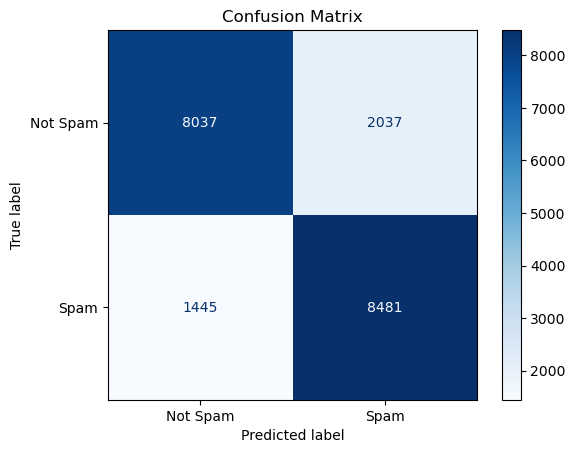

In [54]:
# mx
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

mx = metrics.confusion_matrix(y_test, y_pred10000)
disp = ConfusionMatrixDisplay(confusion_matrix=mx, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred10000))

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82     10074
         1.0       0.81      0.85      0.83      9926

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000



# dataset evaluation

In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
y_train2.value_counts()


1.0    40074
0.0    39926
Name: class, dtype: int64

In [104]:
y_test2.value_counts()

0.0    10074
1.0     9926
Name: class, dtype: int64

In [116]:
# length0 = [len(i) for i in df_['reviewText']]
# length1 = [len(i) for i in df_['reviewTextEdit']]

In [120]:
np.mean(length0), np.mean(length1)

(349.24081, 185.47906)

In [64]:
len(df['reviewTextEdit'][0])

5

In [70]:
df['reviewTextEdit'][1]

1    let start say alwway fan nokia symbian oper sy...
1    bra might nice abl use smallest found rib size...
1    realli cute goe great winterberri item purchas...
1    one broke within first two week gonna tri get ...
1    ok get past goofi look gizmo head famili refer...
Name: reviewTextEdit, dtype: object

In [79]:
print(df2['reviewText'][0])

The buttons keep falling off. But for the price, I don't have too much to complain.


In [111]:
print(len(df2['reviewText'][0]))

83


In [80]:
df_ = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [81]:
len(df), len(df_)

(100000, 100000)

In [91]:
df_['reviewText'][20001]

"This bra might have been nice if I was able to use it. 36 D is the smallest I've found rib size. I find that 36 is still too large around the ribs, but the cups fit. I was excited to find an inexpensive bra with 34 size! Unfortunately this bra fit way too tightly, more like a 32?. Plus, as other reviews reported, it does not fold down very far for nursing. It might work for pumping only. Maybe it will fit better after some baby weight starts to drop off, being that it has only been a few weeks"

In [131]:
df_['class'][20001]

0.0

In [121]:
df.head(5)

,category,summary,reviewText,class,reviewTextEdit
0,Cell_Phones_and_Accessories,yess,Love it. Really worth the money .hasn't bubble...,0.0,love realli worth money bubbl anyth great prod...
1,Cell_Phones_and_Accessories,Faulty SIM card reader,Let me start by saying that I am and will alww...,0.0,let start say alwway fan nokia symbian oper sy...
2,Cell_Phones_and_Accessories,sturdy and functional,love this holster. It kept my phone accessable...,1.0,love holster kept phone access protect easi at...
3,Cell_Phones_and_Accessories,The white case I've been looking for..,This is my third white case I've purchased. I ...,1.0,third white case purchas purchasedwireless cen...
4,Cell_Phones_and_Accessories,It's cool.,I just got it today so I will use it soon but ...,1.0,got today use soon littl disappoint expect lit...


In [147]:
temp = y_train
temp

75220    1.0
48955    0.0
44966    0.0
13568    0.0
92727    1.0
        ... 
6265     1.0
54886    0.0
76820    1.0
860      0.0
15795    1.0
Name: class, Length: 80000, dtype: float64

In [150]:
temp = pd.DataFrame(temp)
temp.to_csv('training_index.csv')

In [136]:
df_['reviewText'][75721]

'I love it. Great watch! The size is perfect. It is a beautiful and excellent quality watch. I am in love with Oris! Oris Rocks!!!'

In [135]:
df_.index

RangeIndex(start=0, stop=100000, step=1)

In [137]:
merged_df = pd.merge(left=temp, right=df_, how='left', left_index=True, right_index=True)


In [138]:
merged_df

,class_x,category,summary,reviewText,class_y,reviewTextEdit
75721,1.0,Sports_and_Outdoors,Oris Rocks!!!,I love it. Great watch! The size is perfect. I...,1.0,love great watch size perfect beauti excel qua...
80184,1.0,Toys_and_Games,Great product!!!,I just received the Eggspert. Delivery was pr...,1.0,receiv eggspert deliveri prompt product exactl...
19864,1.0,Cell_Phones_and_Accessories,GREAT Quality,The case came quickly. And with the belt loops...,1.0,case came quickli belt loop ad secur need ride...
76699,1.0,Sports_and_Outdoors,The grip is great.,Bought this for my Springfield 1911 champion l...,1.0,bought springfield champion lw load right side...
92991,1.0,Toys_and_Games,Great Detail!,"I bought this for my ""Man Cave"" or ""Lair"" as t...",1.0,bought man cave lair call stand top dvd rack a...
...,...,...,...,...,...,...
32595,0.0,Clothing_Shoes_and_Jewelry,"Just ""ok""",I would have to say that this necklace did not...,0.0,would say necklac look like pictur pendant muc...
29313,0.0,Clothing_Shoes_and_Jewelry,Too large,I bought these for my fiance who has very larg...,0.0,bought fianc larg feet well made like think ma...
37862,1.0,Clothing_Shoes_and_Jewelry,Great way to be able to gift these popular nec...,"I bought a few of these, and overall I'm prett...",1.0,bought overal pretti happi especi get nearli t...
53421,1.0,Home_and_Kitchen,"Works great, very durable",I got two of these holders for restrooms that ...,1.0,got two holder restroom use public mainli kept...


In [141]:
y_prime = classifier10000.predict(X)

In [142]:
metrics.accuracy_score(y,y_prime)

0.83623

In [143]:
df_['predict_value_NB'] = y_prime

In [145]:
df_.to_json('dataset_files/final_NB.json', orient='records', lines=True)

In [146]:
# Get the predicted probabilities for all classes
proba = classifier10000.predict_proba(X_test)

# Top-1 class prediction and confidence
top1_class_indices = proba.argmax(axis=1)  # Indices of top-1 predicted classes
top1_confidences = proba.max(axis=1)       # Confidence for the top-1 predicted class

# Confidence for remaining classes
remaining_confidences = 1 - top1_confidences  # Sum of probabilities for non-top-1 classes

# Example: Combine into a structured output
for i, (pred_class, top_conf, rem_conf) in enumerate(zip(top1_class_indices, top1_confidences, remaining_confidences)):
    print(f"Sample {i+1}:")
    print(f"  Predicted Class: {pred_class}")
    print(f"  Top-1 Confidence: {top_conf:.4f}")
    print(f"  Remaining Confidence: {rem_conf:.4f}")


Sample 1:
  Predicted Class: 1
  Top-1 Confidence: 1.0000
  Remaining Confidence: 0.0000
Sample 2:
  Predicted Class: 1
  Top-1 Confidence: 1.0000
  Remaining Confidence: 0.0000
Sample 3:
  Predicted Class: 1
  Top-1 Confidence: 0.9980
  Remaining Confidence: 0.0020
Sample 4:
  Predicted Class: 1
  Top-1 Confidence: 0.9730
  Remaining Confidence: 0.0270
Sample 5:
  Predicted Class: 1
  Top-1 Confidence: 0.9856
  Remaining Confidence: 0.0144
Sample 6:
  Predicted Class: 0
  Top-1 Confidence: 1.0000
  Remaining Confidence: 0.0000
Sample 7:
  Predicted Class: 1
  Top-1 Confidence: 0.9999
  Remaining Confidence: 0.0001
Sample 8:
  Predicted Class: 0
  Top-1 Confidence: 0.9757
  Remaining Confidence: 0.0243
Sample 9:
  Predicted Class: 1
  Top-1 Confidence: 0.8528
  Remaining Confidence: 0.1472
Sample 10:
  Predicted Class: 1
  Top-1 Confidence: 0.7792
  Remaining Confidence: 0.2208
Sample 11:
  Predicted Class: 1
  Top-1 Confidence: 1.0000
  Remaining Confidence: 0.0000
Sample 12:
  Predic